In [7]:
from initialize_model import m, P, P_meta, S, V_meta, Bound, Periods
import initialize_model
import data
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [3]:
S['Date_format'] = '%Y-%m-%d'

In [38]:
Datetime_format = S['Date_format'] + ' ' + S['Time_format']


dt = datetime.strptime(S['Time_step'], S['Time_format']).time()
if dt.hour != 0 and dt.minute == 0 and dt.second == 0:
    dt = dt.hour
elif dt.hour == 0 and dt.minute != 0 and dt.second == 0:
    dt = dt.minute / 60
else:
    print_error('Time_step')

start = S['Period_start'] + ' ' + S['Period_start_time']
dt_start = datetime.strptime(start, Datetime_format)
end = S['Period_end'] + ' ' + S['Period_start_time']
dt_end = datetime.strptime(end, Datetime_format)

Time_steps = ((dt_end - dt_start).days * 24) / dt

if int(Time_steps) == Time_steps:
    Periods = list(range(0, int(Time_steps)))
else:
    print_error('time_step_int')

In [39]:
datetime.strptime(end, Datetime_format) - datetime.strptime(start, Datetime_format)

datetime.timedelta(days=31)

In [49]:
Days = []
Day_one = datetime.strptime(start, Datetime_format)
for d in range(0, (dt_end - dt_start).days):
    Days.append(datetime.strftime(Day_one + timedelta(days=d), S['Date_format']))
print(Days)



['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20', '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31']


In [53]:
Hours = []
for h in range(0, 24):
    Hours.append(datetime.strftime(Day_one + timedelta(hours=h), S['Time_format']))
    
print(Hours)

['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00']


In [43]:
datetime.strftime(datetime.strptime(end, Datetime_format), S['Date_format'])

'2019-02-01'

In [54]:
Day_one + timedelta(hours=0.25)

datetime.datetime(2019, 1, 1, 0, 15)

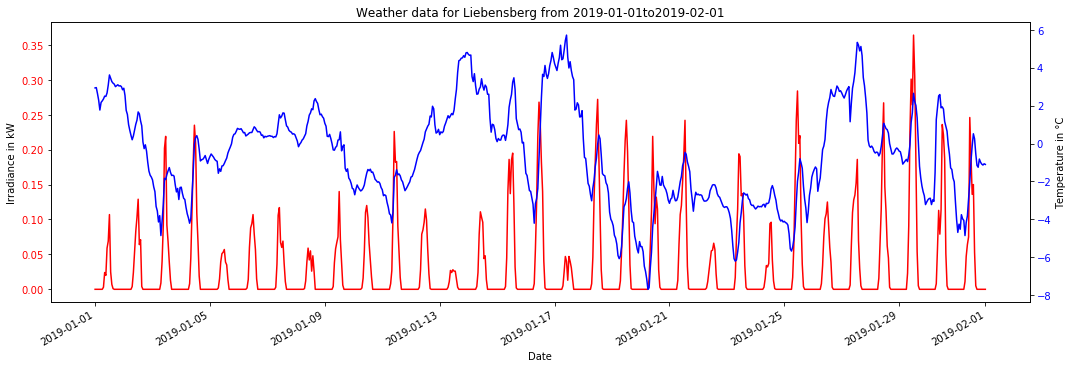

In [40]:
period_start = S['Period_start'] + ' ' + S['Period_start_time']
period_end = S['Period_end'] + ' ' + S['Period_start_time']
timestep = S['Time_step']
file = 'meteo_Liebensberg_10min.csv'

df_weather = data.weather_data_to_df(file, period_start, period_end, timestep)

time = df_weather.index
irr = df_weather['Irradiance']
temp = df_weather['Temperature']

fig, ax1 = plt.subplots()

c = 'red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Irradiance in kW')
ax1.plot(time, irr, color=c)
ax1.tick_params(axis='y', labelcolor=c)
fig.autofmt_xdate()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

c = 'blue'
ax2.set_ylabel('Temperature in °C')  # we already handled the x-label with ax1
ax2.plot(time, temp, color=c)
ax2.tick_params(axis='y', labelcolor=c)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Weather data for Liebensberg from ' + S['Period_start']  + 'to' + S['Period_end'])

plt.rcParams['figure.figsize'] = [15, 5]
plt.show()


In [41]:
fig.autofmt_xdate()

# use a more precise date string for the x axis locations in the
# toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

NameError: name 'mdates' is not defined

In [ ]:
"""
# get a user made csv file into a dataframe
file = 'Consumption_profile_dummy.csv'
folder = 'internal'
df_cons = data.default_data_to_df(file, folder, df_weather.index)

# Plot daily profiles as a function of time
df_cons.plot()
plt.title('Daily consumption and internal gains profiles')
plt.show()
"""